# LENDING CLUB CASE STUDY

In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Sourcing

#### Load `Data_Dictionary.xlsx`

In [626]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

pd.read_excel("Data_Dictionary.xlsx", header=0)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
112,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"
114,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
115,NaN,NaN


#### Load -  `loan.csv`

In [627]:
loan = pd.read_csv('loan.csv', dtype={'next_pymnt_d': object})

## 2. Data Understanding

In [628]:
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [629]:
print(loan.shape)

(39717, 111)


In [630]:
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


## 3. Data Cleaning

#### Step 3.1 - Remove Nulls columns over 90%

In [631]:
#Checking Null Values in percentage across the columns
loan.isna().sum()*100/len(loan)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [556]:
loan = loan.loc[:, loan.isna().sum() < len(loan)*.9]

In [557]:
loan.shape

(39717, 55)

In [558]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### Step 3.2: Remove duplicates based on ID column

In [559]:
loan['id'].duplicated().any() # No Duplicates

False

#### Step 3.3 Removing Columns

In [560]:
#Customer Behaviour Variables
loan.drop(["delinq_2yrs",
           "earliest_cr_line",
           "inq_last_6mths",
           "open_acc",
           "pub_rec",
           "revol_bal",
           "revol_util",
           "total_acc",
           "out_prncp",
           "out_prncp_inv",
           "total_pymnt",
           "total_pymnt_inv",
           "total_rec_prncp",
           "total_rec_int",
           "total_rec_late_fee", 
           "recoveries",
           "collection_recovery_fee",
           "last_pymnt_d",
           "last_pymnt_amnt",
           "last_credit_pull_d",
           "application_type"
           ],axis = 1, inplace=True)

In [561]:
loan.shape

(39717, 34)

In [562]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [563]:
# Removing Columns - Single Value in each column
loan.drop(["pymnt_plan",
           'collections_12_mths_ex_med',
           'policy_code',
           'acc_now_delinq',
           'chargeoff_within_12_mths',
           'delinq_amnt',
           'pub_rec_bankruptcies',
           'tax_liens'
          ],axis = 1, inplace=True)

In [564]:
# Removing Columns - Columns assinged when loan is approved
loan.drop(['id',
           'member_id',
           "emp_title",
           "url",
           'desc',
           'purpose',
           'title',
           "zip_code", # Incomplete zip code
           "mths_since_last_delinq",
           "initial_list_status"
          ],axis = 1, inplace=True)

In [565]:
# Removing Columns - Similar Columns
loan.drop(["funded_amnt", 
           "funded_amnt_inv"] ,axis = 1, inplace=True)

In [566]:
loan.shape

(39717, 14)

In [567]:
# Final List of columns to work on.
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'addr_state', 'dti'],
      dtype='object')

#### Step 3.4 - Removing rows `loan_status` == `Current`

In [568]:
print(loan["loan_status"].value_counts())

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [569]:
loan = loan[loan["loan_status"] != 'Current']

In [570]:
loan.shape

(38577, 14)

#### Step 3.5 - Fixing `term` column (Removing `month`)

In [571]:
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [572]:
loan.term = loan.term.apply(lambda x: int(x.replace(" months", "")))

In [573]:
loan.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

#### Step 3.6 - Fixing `int_rate` column (Removing `%`)

In [574]:
loan.int_rate = loan.int_rate.apply(lambda x: float(x[:-1]))

In [575]:
loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

#### Step 3.7 - Fixing column `emp_length` (removing `years` and `+`)  

In [576]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [577]:
loan.emp_length = loan.emp_length.astype('str')

In [578]:
loan.emp_length = loan.emp_length.apply(lambda x: x.strip(" years"))

In [579]:
loan.emp_length.unique()

array(['10+', '< 1', '3', '8', '9', '4', '5', '1', '6', '2', '7', 'nan'],
      dtype=object)

In [580]:
def clean(input):
    if "nan" in input:
        return int(-1)
    elif "+" in input:
        return int(input.replace("+", ""))
    elif "<" in input:
        return int(input.replace("< ", ""))
    else:
        return int(input)

loan.emp_length = loan.emp_length.apply(clean)

In [581]:
loan.emp_length.unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7, -1])

In [582]:
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [583]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [584]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Step 3.8 - Deriving `issue_month` and `issue_year` from `issue_d`

In [585]:
from datetime import datetime
loan["issued_month"] = pd.DatetimeIndex(loan.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y'))).month

In [586]:
loan.issued_month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [587]:
loan["issued_year"] = pd.DatetimeIndex(loan.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y'))).year

In [588]:
loan.issued_year.unique()

array([2011, 2010, 2009, 2008, 2007])

In [589]:
loan.drop(["issue_d"] ,axis = 1, inplace=True)

#### Step 3.9 - Driving numeric value from `sub_grade`

In [590]:
loan.sub_grade = loan.sub_grade.astype("string")

In [591]:
loan.sub_grade = loan.sub_grade.apply(lambda x: int(x[-1]))

In [592]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'addr_state', 'dti', 'issued_month', 'issued_year'],
      dtype='object')

In [593]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,issued_month,issued_year
0,5000,36,10.65,162.87,B,2,10,RENT,24000.0,Verified,Fully Paid,AZ,27.65,12,2011
1,2500,60,15.27,59.83,C,4,1,RENT,30000.0,Source Verified,Charged Off,GA,1.00,12,2011
2,2400,36,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,Fully Paid,IL,8.72,12,2011
3,10000,36,13.49,339.31,C,1,10,RENT,49200.0,Source Verified,Fully Paid,CA,20.00,12,2011
5,5000,36,7.90,156.46,A,4,3,RENT,36000.0,Source Verified,Fully Paid,AZ,11.20,12,2011


## 4. Outlier Treatment

#### Step 4.1 - Treating `annual_inc`

<AxesSubplot:xlabel='annual_inc'>

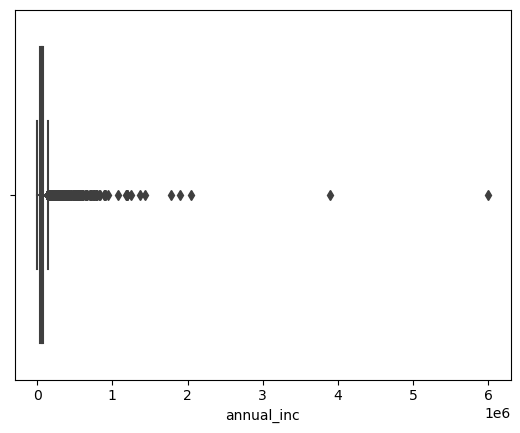

In [594]:
sns.boxplot(loan['annual_inc'])

In [595]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [596]:
annual_inc_99_per = loan['annual_inc'].quantile(0.99)
loan = loan[loan.annual_inc <= annual_inc_99_per]

<AxesSubplot:xlabel='annual_inc'>

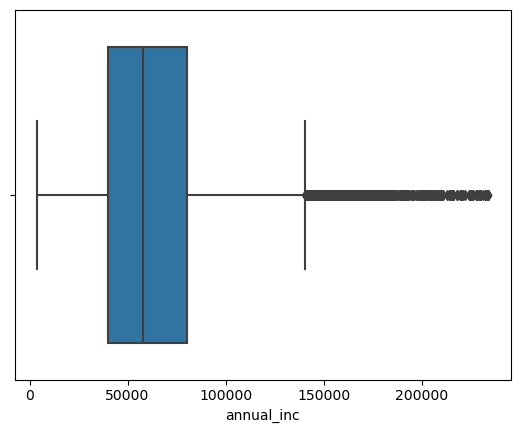

In [597]:
sns.boxplot(loan.annual_inc)

## 5. Univariant Analysis

#### Step 5.1 -  `loan_status` 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

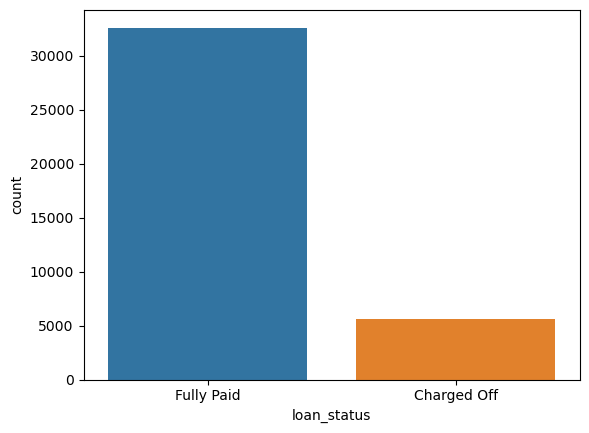

In [598]:
sns.countplot(x = 'loan_status', data = loan)

#### Step 5.2 - `term` 

<AxesSubplot:xlabel='term', ylabel='count'>

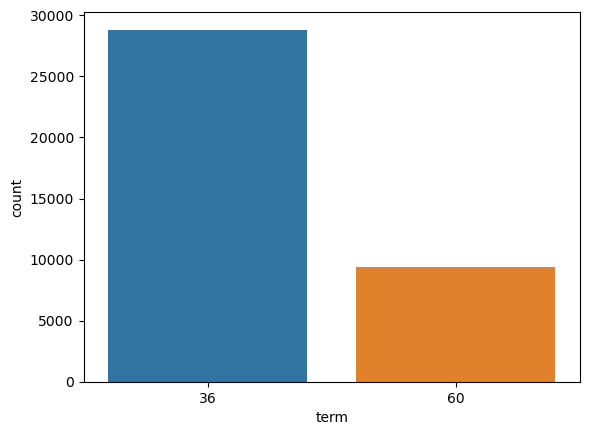

In [599]:
sns.countplot(x = 'term', data = loan)

#### Step 5.3 - `home_ownership` 

In [600]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [601]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [602]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

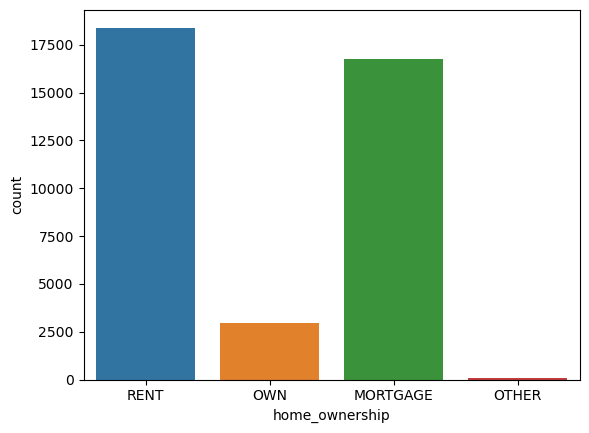

In [603]:
sns.countplot(x = 'home_ownership', data = loan)

#### Step 5.4 - `addr_state` 

[Text(0, 0, 'AZ'),
 Text(1, 0, 'GA'),
 Text(2, 0, 'IL'),
 Text(3, 0, 'CA'),
 Text(4, 0, 'NC'),
 Text(5, 0, 'TX'),
 Text(6, 0, 'VA'),
 Text(7, 0, 'MO'),
 Text(8, 0, 'CT'),
 Text(9, 0, 'UT'),
 Text(10, 0, 'FL'),
 Text(11, 0, 'NY'),
 Text(12, 0, 'PA'),
 Text(13, 0, 'MN'),
 Text(14, 0, 'NJ'),
 Text(15, 0, 'OR'),
 Text(16, 0, 'KY'),
 Text(17, 0, 'OH'),
 Text(18, 0, 'SC'),
 Text(19, 0, 'RI'),
 Text(20, 0, 'LA'),
 Text(21, 0, 'MA'),
 Text(22, 0, 'WA'),
 Text(23, 0, 'WI'),
 Text(24, 0, 'AL'),
 Text(25, 0, 'NV'),
 Text(26, 0, 'AK'),
 Text(27, 0, 'CO'),
 Text(28, 0, 'MD'),
 Text(29, 0, 'WV'),
 Text(30, 0, 'VT'),
 Text(31, 0, 'MI'),
 Text(32, 0, 'DC'),
 Text(33, 0, 'SD'),
 Text(34, 0, 'NH'),
 Text(35, 0, 'AR'),
 Text(36, 0, 'NM'),
 Text(37, 0, 'KS'),
 Text(38, 0, 'HI'),
 Text(39, 0, 'OK'),
 Text(40, 0, 'MT'),
 Text(41, 0, 'WY'),
 Text(42, 0, 'DE'),
 Text(43, 0, 'MS'),
 Text(44, 0, 'TN'),
 Text(45, 0, 'IA'),
 Text(46, 0, 'NE'),
 Text(47, 0, 'ID'),
 Text(48, 0, 'IN'),
 Text(49, 0, 'ME')]

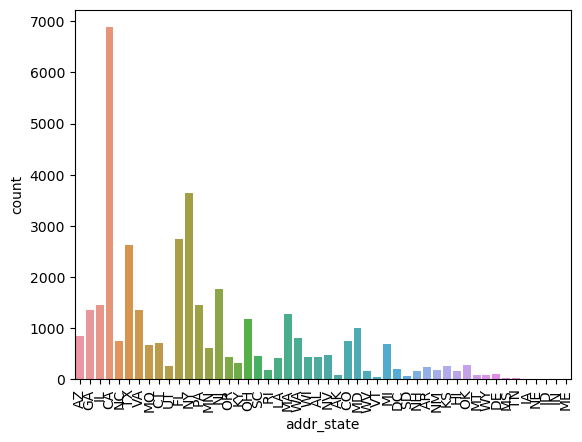

In [604]:
g = sns.countplot(x = 'addr_state', data = loan)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Step 5.5 -  `int_rate` 

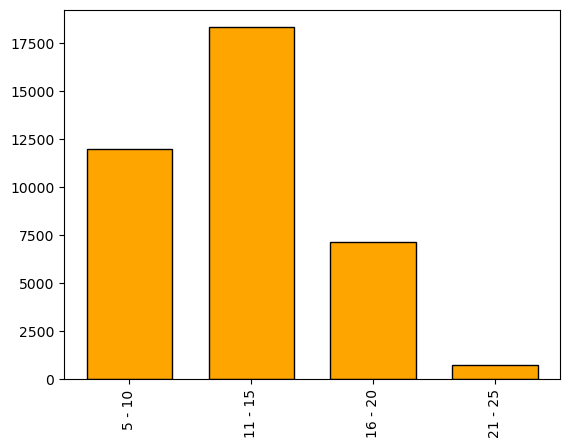

In [605]:
x = [7.5, 12.5, 17.5, 22.5]
labels = ['5 - 10', '11 - 15','16 - 20','21 - 25']
plt.hist(loan['int_rate'], bins = [5,10,15,20,25],rwidth = 0.7, color = "orange", edgecolor = 'k')
plt.xticks(x, labels, rotation ='vertical')
plt.show()

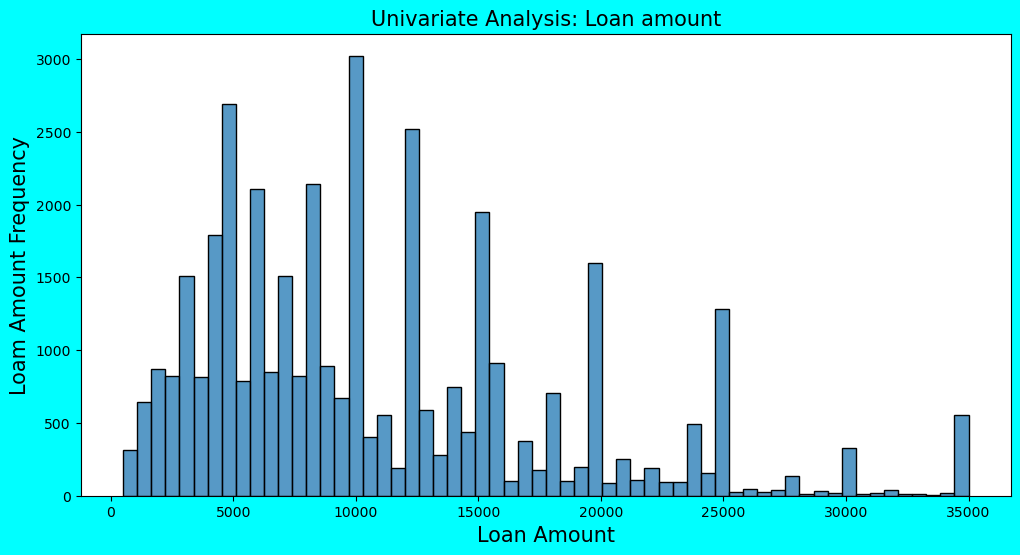

In [606]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Loan amount', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x = loan.loan_amnt)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Loan Amount', fontdict=xy_fontdict)
plt.ylabel('Loam Amount Frequency', fontdict=xy_fontdict)
plt.show()

<AxesSubplot:ylabel='Density'>

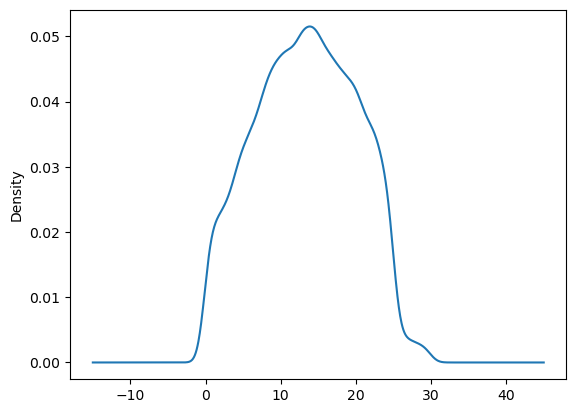

In [607]:
loan['dti'].plot(kind='kde')
#Most loans are lent to borrowers with DTI ratio in between 10 and 20.

Text(0.5, 9.444444444444438, 'Employment length (in years)')

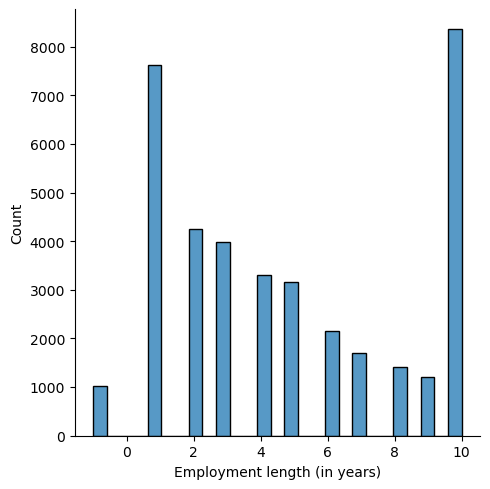

In [608]:
sns.displot(loan.emp_length)
plt.xlabel('Employment length (in years)')

#### Step 5.6 Observation from Univariant Analysis
- Majority of the loans are fully paid, only about ~5500(15%) loans are charged-off
- Majority of the loan applications opts for 36 months loan term. About ~30,000 (75%)
- Minority of the folks who has loan are actually home owners (about ~2500 home owners only)
- Majority of the loan applications are from California State
- Majority of the loan amount are from ~5K to ~15K
- Most loans are lent to borrowers with DTI ratio in between 10 and 20.
- Majority of the home owners have either high work experience of 10 + years or 1 year. 

## 6. Segmented Univariate Analysis

In [609]:
loan.groupby(["loan_status", 'home_ownership'])["loan_amnt"].agg(np.mean)

loan_status  home_ownership
Charged Off  MORTGAGE          14010.469157
             OTHER             13747.222222
             OWN               10996.306818
             RENT              10591.058782
Fully Paid   MORTGAGE          12081.579676
             OTHER              9559.567901
             OWN                9868.617870
             RENT               9719.859693
Name: loan_amnt, dtype: float64

In [610]:
loan.groupby(["loan_status", 'emp_length'])["loan_amnt"].agg(np.mean)

loan_status  emp_length
Charged Off  -1             8824.669604
              1            10411.995413
              2            10656.149733
              3            11297.731397
              4            11430.592105
              5            12029.276316
              6            12596.803279
              7            12810.591603
              8            13050.862069
              9            12996.815287
              10           14518.028116
Fully Paid   -1             8321.941323
              1             9588.533374
              2             9901.092562
              3            10405.633392
              4            10675.839454
              5            10900.672935
              6            11123.808234
              7            11247.473868
              8            11401.562500
              9            11676.984877
              10           12363.064791
Name: loan_amnt, dtype: float64

In [611]:
loan.groupby(["loan_status"])["int_rate"].agg(np.mean)

loan_status
Charged Off    13.808626
Fully Paid     11.594082
Name: int_rate, dtype: float64

In [612]:
loan.groupby(["loan_status"])["dti"].agg(np.mean)

loan_status
Charged Off    14.044989
Fully Paid     13.211646
Name: dti, dtype: float64

In [613]:
loan.groupby(["loan_status"])["annual_inc"].agg(np.mean)

loan_status
Charged Off    59840.876109
Fully Paid     66250.824386
Name: annual_inc, dtype: float64

In [614]:
loan.groupby(["loan_status"])["installment"].agg(np.mean)

loan_status
Charged Off    334.277242
Fully Paid     317.483484
Name: installment, dtype: float64

In [615]:
loan.groupby(["loan_status", "grade"])["loan_amnt"].agg(np.mean)

loan_status  grade
Charged Off  A         7801.247920
             B        10852.422207
             C        11006.054396
             D        12184.172662
             E        15782.137784
             F        19059.134615
             G        18557.575758
Fully Paid   A         8625.871907
             B        10870.165732
             C        10691.705662
             D        12006.730524
             E        15446.432319
             F        17244.158879
             G        20827.105263
Name: loan_amnt, dtype: float64

In [616]:
loan.groupby(["loan_status", "home_ownership"])["loan_amnt"].agg(np.mean)

loan_status  home_ownership
Charged Off  MORTGAGE          14010.469157
             OTHER             13747.222222
             OWN               10996.306818
             RENT              10591.058782
Fully Paid   MORTGAGE          12081.579676
             OTHER              9559.567901
             OWN                9868.617870
             RENT               9719.859693
Name: loan_amnt, dtype: float64

In [617]:
loan.groupby(["loan_status", "verification_status"])["loan_amnt"].agg(np.mean)

loan_status  verification_status
Charged Off  Not Verified            8630.622066
             Source Verified        10625.562588
             Verified               16611.368110
Fully Paid   Not Verified            8314.532956
             Source Verified         9708.796410
             Verified               15211.213621
Name: loan_amnt, dtype: float64

#### Step 6.1 Observation from Segmented Univariate Analysis
- Loan amount for charged-off loans are higher than fully paid loans
- Interests rate are higher for charged off loans.
- DTI ration for charged-off loans are higher.
- Annual income for fully paid loan are higher.
- Interestingly, loan amount goes up with pooper grade.
- The loan amounts are higher for people with Mortage then people with own houses.
- The loan amounts are higer for verified individuals

## 7. Bivariate Analysis

#### Step 7.1 - Continous Variable - Bivariant Analysis

(9.5, -0.5)

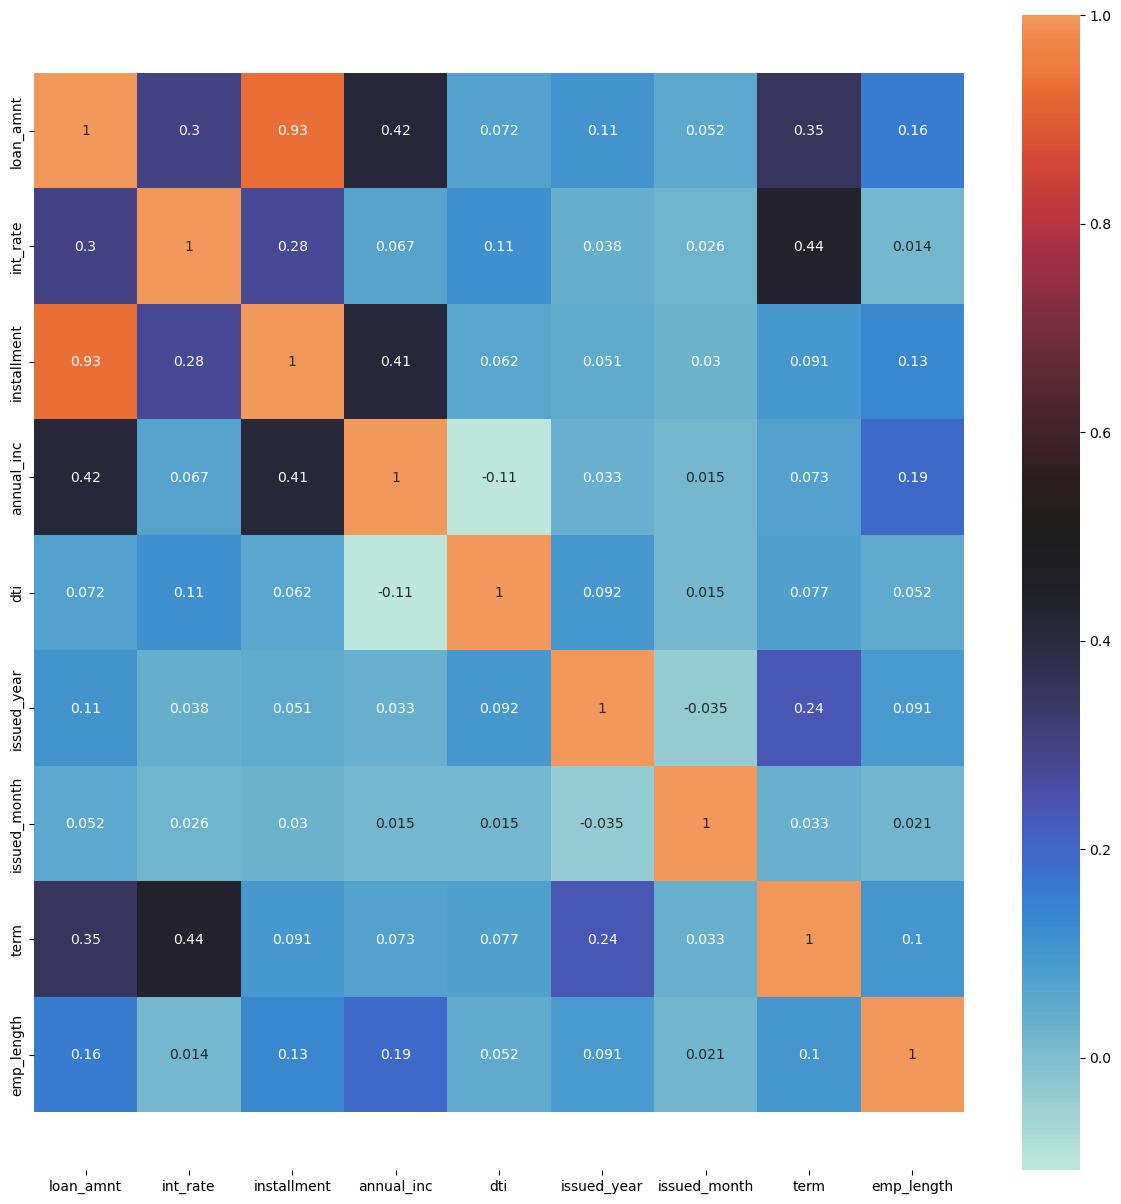

In [618]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment','annual_inc','dti', 'issued_year', 'issued_month', 'term', 'emp_length']
corr = loan[cont_var].corr()
g=sns.heatmap(corr, annot=True, center=0.5)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5,top - 0.5)

#### Step 7.2 - Categorical Variable - Bivariant Analysis

In [619]:
pd.pivot_table(loan, index=["grade"],columns=['loan_status'], aggfunc=np.mean)

annual_inc                       dti             emp_length  \
loan_status   Charged Off    Fully Paid Charged Off Fully Paid Charged Off   
grade                                                                        
A            52181.767671  64846.519149   13.362679  12.011012    4.747088   
B            56968.265969  65706.901148   13.885778  13.382458    4.798444   
C            56669.875075  64714.140894   14.436699  13.815119    4.875559   
D            60738.125665  66402.922496   13.995504  13.970176    5.017986   
E            68215.209702  73831.602975   14.290227  14.105855    5.103693   
F            74858.985224  80107.243364   14.120929  14.389564    5.580128   
G            73391.945758  90504.836211   13.723838  14.376895    5.131313   

                       installment                int_rate             \
loan_status Fully Paid Charged Off  Fully Paid Charged Off Fully Paid   
grade                                                                   
A             4.950405  231.631730  257.125358    7.595890   7.312759   
B             4.862005  298.684335  320.117623   11.127023  10.992697   
C             4.725160  308.060209  317.249153   13.600894  13.518200   
D             4.839336  344.696835  364.560054   15.840207  15.611267   
E             5.093389  418.563310  424.668284   17.862372  17.535829   
F             5.063863  515.169519  473.103925   20.005449  19.448115   
G             5.678947  534.673333  591.859632   21.465758  21.204053   

            issued_month             issued_year                  loan_amnt  \
loan_status  Charged Off Fully Paid  Charged Off   Fully Paid   Charged Off   
grade                                                                         
A               7.517471   7.238268  2010.424293  2010.372867   7801.247920   
B               7.398868   7.122652  2010.326733  2010.311891  10852.422207   
C               7.193741   7.036968  2010.253353  2010.157542  11006.054396   
D               7.211331   6.821967  2010.329137  2010.247510  12184.172662   
E               7.281250   6.891920  2010.522727  2010.380902  15782.137784   
F               7.544872   6.679128  2010.592949  2010.496885  19059.134615   
G               7.535354   6.884211  2010.525253  2010.484211  18557.575758   

                            sub_grade                   term             
loan_status    Fully Paid Charged Off Fully Paid Charged Off Fully Paid  
grade                                                                    
A             8625.871907    3.792013   3.426728   37.477537  36.911263  
B            10870.165732    3.335926   3.157372   43.451202  40.473296  
C            10691.705662    2.731744   2.666043   44.941878  41.843706  
D            12006.730524    3.026079   2.850319   47.568345  44.000000  
E            15446.432319    2.698864   2.655299   54.136364  51.462749  
F            17244.158879    2.721154   2.411215   56.000000  54.280374  
G            20827.105263    2.424242   2.505263   55.151515  55.578947

In [620]:
pd.pivot_table(loan, index=["home_ownership"],columns=['loan_status'], aggfunc=np.mean)

annual_inc                       dti             emp_length  \
loan_status      Charged Off    Fully Paid Charged Off Fully Paid Charged Off   
home_ownership                                                                  
MORTGAGE        71541.635248  78657.233157   14.280026  13.027207    5.817550   
OTHER           63433.055556  64750.086420   13.128889  10.871235    4.500000   
OWN             51251.331864  56723.451855   13.859432  13.139753    4.663636   
RENT            51618.352277  56283.811067   13.888148  13.406484    4.276912   

                          installment                int_rate             \
loan_status    Fully Paid Charged Off  Fully Paid Charged Off Fully Paid   
home_ownership                                                             
MORTGAGE         5.825696  377.370821  346.361754   13.777255  11.301053   
OTHER            4.061728  444.305556  300.613580   13.185556  11.600000   
OWN              4.944555  306.891659  293.531328   13.688705  11.322513   
RENT             3.996725  302.714823  294.638754   13.856856  11.909592   

               issued_month             issued_year               \
loan_status     Charged Off Fully Paid  Charged Off   Fully Paid   
home_ownership                                                     
MORTGAGE           7.289314   7.092275  2010.387489  2010.362315   
OTHER              4.777778   6.432099  2009.111111  2008.641975   
OWN                7.225000   7.262864  2010.388636  2010.256881   
RENT               7.377479   7.041161  2010.347380  2010.257818   

                   loan_amnt                 sub_grade                   term  \
loan_status      Charged Off    Fully Paid Charged Off Fully Paid Charged Off   
home_ownership                                                                  
MORTGAGE        14010.469157  12081.579676    3.052129   3.044787   47.833189   
OTHER           13747.222222   9559.567901    3.000000   3.246914   37.333333   
OWN             10996.306818   9868.617870    3.086364   3.046669   46.363636   
RENT            10591.058782   9719.859693    3.037535   3.061709   44.983003   

                           
loan_status    Fully Paid  
home_ownership             
MORTGAGE        42.326457  
OTHER           36.000000  
OWN             40.575987  
RENT            40.165671

In [621]:
pd.pivot_table(loan, index=["term"],columns=['loan_status'], aggfunc=np.mean)

annual_inc                       dti             emp_length  \
loan_status   Charged Off    Fully Paid Charged Off Fully Paid Charged Off   
term                                                                         
36           56582.413240  64753.875804   13.689053  12.958569    4.495158   
60           64217.854557  71737.850966   14.523105  14.139295    5.545111   

                       installment                int_rate             \
loan_status Fully Paid Charged Off  Fully Paid Charged Off Fully Paid   
term                                                                    
36            4.707354  308.689547  309.268172   12.370347  10.823664   
60            5.513092  368.648292  347.596499   15.740617  14.418028   

            issued_month             issued_year                  loan_amnt  \
loan_status  Charged Off Fully Paid  Charged Off   Fully Paid   Charged Off   
term                                                                          
36              7.135583   7.040714  2010.088097  2010.202631   9319.900031   
60              7.569450   7.220919  2010.732690  2010.657032  15700.409148   

                            sub_grade             
loan_status    Fully Paid Charged Off Fully Paid  
term                                              
36            9542.342298    3.030303   3.043719  
60           15303.634282    3.070080   3.089426

In [624]:
pd.pivot_table(loan, index=["verification_status"],columns=['loan_status'], aggfunc=np.mean)

annual_inc                       dti             \
loan_status           Charged Off    Fully Paid Charged Off Fully Paid   
verification_status                                                      
Not Verified         53288.366376  59359.072320   13.848554  12.916756   
Source Verified      58072.269951  64523.209738   12.945823  12.632513   
Verified             67947.078711  77632.326230   15.020098  14.109627   

                     emp_length            installment              \
loan_status         Charged Off Fully Paid Charged Off  Fully Paid   
verification_status                                                  
Not Verified           4.588732   4.702225  260.640991  257.319224   
Source Verified        4.709564   4.662651  289.629761  284.203666   
Verified               5.478346   5.314331  442.709296  431.646454   

                       int_rate            issued_month             \
loan_status         Charged Off Fully Paid  Charged Off Fully Paid   
verification_status                                                  
Not Verified          12.683061  10.941369     6.982160   6.797568   
Source Verified       14.126512  11.622092     7.413502   7.204942   
Verified              14.766019  12.516126     7.610728   7.385039   

                     issued_year                  loan_amnt                \
loan_status          Charged Off   Fully Paid   Charged Off    Fully Paid   
verification_status                                                         
Not Verified         2010.007512  2010.034130   8630.622066   8314.532956   
Source Verified      2010.693390  2010.613474  10625.562588   9708.796410   
Verified             2010.504921  2010.429943  16611.368110  15211.213621   

                      sub_grade                   term             
loan_status         Charged Off Fully Paid Charged Off Fully Paid  
verification_status                                                
Not Verified           3.033803   3.029225   41.509859  38.785685  
Source Verified        3.016174   3.040816   48.016878  41.789034  
Verified               3.083169   3.099010   49.960630  44.033603

## 8. Recommendations/Observations from Case Study

The below analysis is for the chanrged-off loans. The probability for defaulting increases with following:
- If the applicant home ownership is mortgage and loan amount is greater than 14K.
- if the applicant employment duration is 10+ years and loan amount is greater than 14k.
- Higher interest rate with around 14% rate, increasses the default posibility.
- DTI ration of over 14, increasses the default posibility.
- Lower annual income of about 60K, increasses the default posibility.
- Grade G loan, with annual income of about 74K are more likely to default.
- Owners on Rent with about 50K annual income, and 14% interest are more likely to default.
- When the loan is verified and loan amount is over 16K and interest rate is around 15%.